# Iman Noor
---
# **🔴 Data Preprocessing Using scikit-learn**

Data preprocessing involves preparing raw data for further analysis and modeling by performing various transformations and cleaning operations. Effective preprocessing can significantly enhance the performance of machine learning models.

## 1. Data Encoding

Data encoding is the process of converting categorical variables into numerical formats that can be used by machine learning algorithms. Two common encoding techniques are:

### a) Label Encoding

Label encoding involves converting each category into a unique numerical label. This method is straightforward but may not be suitable for all models, especially those that assume ordinal relationships among categories.

**Example:**
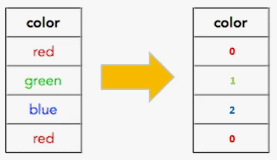

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
# Categorical data
vehicle_types = ['Car', 'Truck', 'Motorcycle', 'Bicycle', 'Car', 'Truck']

In [3]:
# Apply LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(vehicle_types)
print(encoded_labels)

[1 3 2 0 1 3]


**Consideration:** Label encoding might not be ideal for algorithms that interpret numerical values as ordinal data, which can misrepresent non-ordinal categories.

### b) One-Hot Encoding

One-hot encoding creates binary columns for each category, where each column represents a category with a 1 or 0. This method avoids the ordinal interpretation issue present in label encoding.

**Example:**
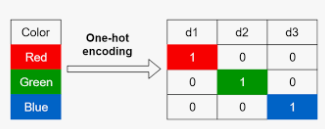

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Apply OneHotEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(vehicle_types).reshape(-1, 1)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(labels)
print(onehot_encoded)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


C:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### *Pandas Alternative*

In [7]:
import pandas as pd

In [9]:
vehicle_df = pd.DataFrame(vehicle_types, columns=['Vehicle_Type'])
onehot_encoded_df = pd.get_dummies(vehicle_df)
onehot_encoded_df.head()

,Vehicle_Type_Bicycle,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,1,0,0


## 2. Feature Scaling

Feature scaling adjusts the range of feature values to improve model performance and convergence during training. Common scaling techniques include:

### a) StandardScaler

StandardScaler standardizes features by removing the mean and scaling to unit variance. It assumes the data follows a Gaussian distribution.

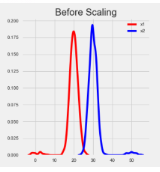          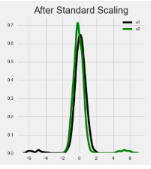

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Numerical data
data = {'Age': [25, 35, 45, 50, 29], 'Salary': [50000, 60000, 70000, 80000, 55000]}
df = pd.DataFrame(data)
df.head()

,Age,Salary
0,25,50000
1,35,60000
2,45,70000
3,50,80000
4,29,55000


In [14]:
# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
new_df = pd.DataFrame(scaled_data, columns=df.columns)
new_df.head()

,Age,Salary
0,-1.251079,-1.207020
1,-0.190843,-0.278543
2,0.869394,0.649934
3,1.399512,1.578410
4,-0.826984,-0.742781


**Use Case:** StandardScaler is ideal for algorithms that assume normally distributed data, such as linear regression and logistic regression.

### b) MinMaxScaler

MinMaxScaler scales features to a specified range, usually [0, 1]. It transforms the data to a uniform scale without assuming any distribution.

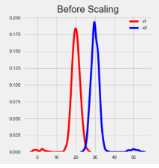         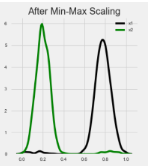

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(df)
m_df = pd.DataFrame(minmax_scaled_data, columns=df.columns)
m_df.head()

,Age,Salary
0,0.00,0.000000
1,0.40,0.333333
2,0.80,0.666667
3,1.00,1.000000
4,0.16,0.166667


**Use Case:** MinMaxScaler is useful when you need features to be bounded within a specific range, which is beneficial for algorithms that are sensitive to feature scaling, like neural networks.

> **Note:** Data preprocessing involves encoding categorical variables and scaling numerical features to prepare the data for machine learning algorithms. Proper preprocessing helps improve model accuracy and performance. 

## Data Preparation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [18]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turja, Miss. Anna Sofia",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Handle Missing Values and Prepare Features

In [22]:
# Numerical and categorical features
numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

In [23]:
X = df[numerical_features + categorical_features]
y = df['Survived']

### IMPUTER function:

IMPUTER function is one which lets you replace `NULL` values in a `string or numerical` expression. You can replace NULL values with the most frequently used value for string expressions, or the mean or median value for numerical expressions.

In [24]:
# Impute missing values
imputer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
    ]
)

In [25]:
X_imputed = imputer.fit_transform(X)

In [26]:
print("\nDataFrame After Imputation (first 5 rows):")
imputed_df = pd.DataFrame(X_imputed, columns=numerical_features + categorical_features)
imputed_df.head()


DataFrame After Imputation (first 5 rows):


,Age,Fare,Sex,Embarked,Pclass
0,22.0,7.25,male,S,3
1,38.0,71.2833,female,C,1
2,26.0,7.925,female,S,3
3,35.0,53.1,female,S,1
4,35.0,8.05,male,S,3


### Encode Categorical Variables
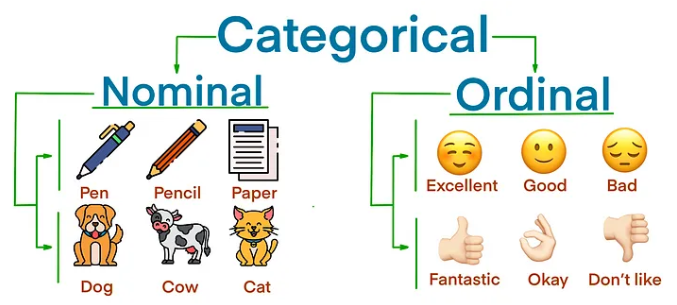

In [27]:
encoder = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [30]:
X_encoded = encoder.fit_transform(imputed_df)

In [31]:
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
print("\nEncoded DataFrame (first 5 rows):")
encoded_df.head()


Encoded DataFrame (first 5 rows):


,num__Age,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3
0,22.0,7.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,7.925,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,53.1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,8.05,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Feature Scaling
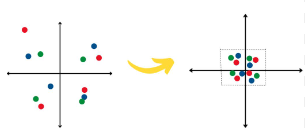

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [33]:
scaled_df = pd.DataFrame(X_scaled, columns=encoded_df.columns)
print("\nScaled DataFrame (first 5 rows):")
scaled_df.head()


Scaled DataFrame (first 5 rows):


,num__Age,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3
0,-0.592481,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
1,0.638789,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803,1.767767,-0.510152,-1.107926
2,-0.284663,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
3,0.407926,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1.767767,-0.510152,-1.107926
4,0.407926,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587


### Split the Dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Model Training and Evaluation

In [42]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

In [43]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

print("Model performance:\n", results)

Model performance:
 {'Logistic Regression': 0.8022388059701493, 'Random Forest': 0.7798507462686567}


## Hyperparameter Tuning

### Grid Search and Random Search

In [44]:
# Parameter grids
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [45]:
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

In [48]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'saga']})

In [49]:
print("\nBest parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)


Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'saga'}
Best score for Logistic Regression: 0.7977290322580647


In [50]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [51]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Random Forest: 0.8219354838709678


### Random Search (Alternative)

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
random_search_lr = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_distributions=param_grid_lr, n_iter=10, cv=5)
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid_rf, n_iter=10, cv=5)

In [54]:
random_search_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'solver': ['liblinear', 'saga']})

In [55]:
print("\nBest parameters for Logistic Regression (Random Search):", random_search_lr.best_params_)
print("Best score for Logistic Regression (Random Search):", random_search_lr.best_score_)


Best parameters for Logistic Regression (Random Search): {'solver': 'saga', 'C': 0.01}
Best score for Logistic Regression (Random Search): 0.7977290322580647


In [56]:
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [57]:
print("Best parameters for Random Forest (Random Search):", random_search_rf.best_params_)
print("Best score for Random Forest (Random Search):", random_search_rf.best_score_)

Best parameters for Random Forest (Random Search): {'n_estimators': 50, 'min_samples_split': 10, 'max_depth': None}
Best score for Random Forest (Random Search): 0.8234322580645161


# **The End :)**